<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E3%83%80%E3%83%9F%E3%83%BC%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

・数式演算ライブラリのNumPyに慣れる

・グラフの表示に慣れる

どのように学ぶか

ヒントを示すので、それに従いデータの作成と作図を行っていきます。

In [ ]:
ダミーデータの作成

機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。

散布図で描くと次のようになるデータを作っていきます。


【問題１】乱数の作成

平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[[1.0 0.8]

 [0.8 1.0]]

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。


numpy.random.multivariate_normal — NumPy v1.19 Manual


作成したndarrayのshapeは(500, 2)になります。


《シード値について》


実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

In [1]:
import numpy as np

In [2]:
import random

In [3]:
np.random.seed(0) # 実行ごとに値が変わってしまわないようにするためのもの

In [11]:
n_samples = 500 # サンプル数(default)
mean = [-3, 0] # 平均
cov = [[1.0, 0.8], [0.8, 1.0]] # 共分散

In [12]:
dummy_data = np.random.multivariate_normal(mean, cov, n_samples) # 乱数の生成
print(dummy_data.shape)

(500, 2)


【問題2】散布図による可視化

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x = dummy_data[:, 0]
y = dummy_data[:, 1]

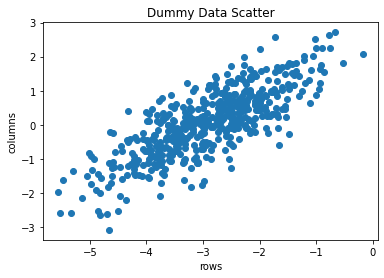

In [10]:
plt.title("Dummy Data Scatter")
plt.xlabel("rows")
plt.ylabel("columns")
plt.scatter(x, y)  
plt.show()

【問題３】　ヒストグラムによる可視化

問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムはplt.hist()を使うことで描けます。


matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation


各次元ごとに作成し、2つのヒストグラムとしてください。


それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。


matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

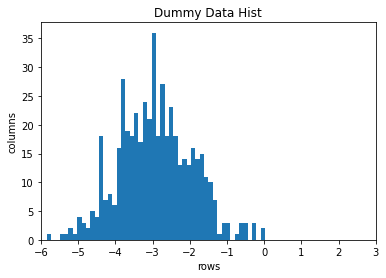

In [31]:
plt.title("Dummy Data Hist")
plt.xlabel("rows")
plt.ylabel("columns")
plt.hist(dummy_data[:, 0], bins = 50)  # 「リスト名」のところにリストの変数名を入れる
plt.xlim(-6, 3)
plt.show()

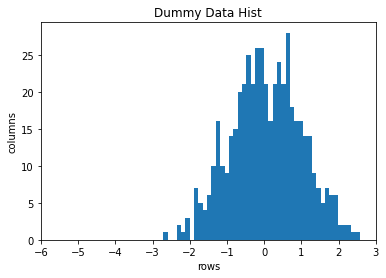

In [32]:
plt.title("Dummy Data Hist")
plt.xlabel("rows")
plt.ylabel("columns")
plt.hist(dummy_data[:, 1], bins = 50)  # 「リスト名」のところにリストの変数名を入れる
plt.xlim(-6, 3)
plt.show()

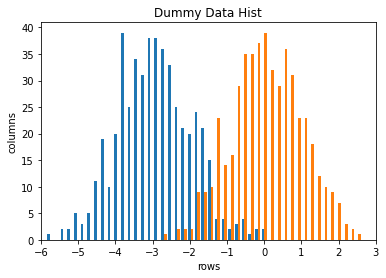

In [30]:
plt.title("Dummy Data Hist")
plt.xlabel("rows")
plt.ylabel("columns")
plt.hist(dummy_data, bins = 50)  # 「リスト名」のところにリストの変数名を入れる
plt.xlim(-6, 3)
plt.show()

【問題4】データの追加

新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[[1.0, 0.8]
 [0.8, 1.0]]

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題4のものは1を表示してください。

In [13]:
n_samples2 = 500 # サンプル数(default)
mean2 = [0, -3] # 平均
cov2 = [[1.0, 0.8], [0.8, 1.0]] # 共分散

In [14]:
dummy_data2 = np.random.multivariate_normal(mean2, cov2, n_samples2) # 乱数の生成
print(dummy_data2.shape)

(500, 2)


In [16]:
x2 = dummy_data2[:, 0]
y2 = dummy_data2[:, 1]

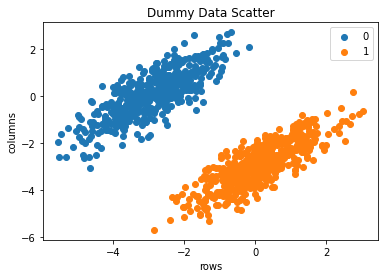

In [17]:
plt.title("Dummy Data Scatter")
plt.xlabel("rows")
plt.ylabel("columns")
plt.scatter(x, y, label = "0")  # 問題１のデータはデータは0の凡例をつける
plt.scatter(x2, y2, label = "1")  # 問題4のデータはデータは1の凡例をつける
plt.legend()
plt.show()

【問題5】データの結合

データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。



In [18]:
marged_data = np.concatenate([dummy_data, dummy_data2], axis = 0)

In [19]:
print(marged_data.shape)

(1000, 2)


【問題６】　ラベル付け

ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示すラベル付けを行ってください。問題1のものには0、問題4のものには1を対応させます。


0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。


機械学習に使用するデータセットはこのような形になっていることが多いです。


《作成例》


データが3個+3個の場合は以下のような(6, 3)のndarrayになります。

In [24]:
data1_labeled = np.insert(dummy_data, 2, 0, axis=1)

In [25]:
print(data1_labeled)

[[-3.80965753 -0.24520748  0.        ]
 [-2.63247046  0.4337565   0.        ]
 [-3.28006393 -0.15263683  0.        ]
 ...
 [-3.2185878  -0.15676476  0.        ]
 [-4.37970304 -1.27950068  0.        ]
 [-1.50213196  0.66873757  0.        ]]


In [26]:
data2_labeled = np.insert(dummy_data2, 2, 1, axis=1)

In [27]:
print(data2_labeled)

[[ 1.9956291  -2.0871159   1.        ]
 [ 0.25929706 -3.34683218  1.        ]
 [ 0.2992444  -3.14591514  1.        ]
 ...
 [-0.96110234 -2.64611556  1.        ]
 [ 0.92174137 -2.19994573  1.        ]
 [ 1.17578092 -1.87519405  1.        ]]


In [28]:
final_data = np.concatenate([data1_labeled, data2_labeled], axis = 0)

In [31]:
print(final_data.shape)
print(final_data)

(1000, 3)
[[-3.80965753 -0.24520748  0.        ]
 [-2.63247046  0.4337565   0.        ]
 [-3.28006393 -0.15263683  0.        ]
 ...
 [-0.96110234 -2.64611556  1.        ]
 [ 0.92174137 -2.19994573  1.        ]
 [ 1.17578092 -1.87519405  1.        ]]
